<a href="https://colab.research.google.com/github/jcmachicao/pucp_termodinamica/blob/main/pucp__termodinamica_diagrama_hp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guía para Diagrama h-p
by José Carlos Machicao

Updated: Feb, 2025

In [ ]:
!pip install CoolProp

In [ ]:
import CoolProp.CoolProp as CP

# Create a simple linear mixing rule for the Helium and Xenon pair
CP.apply_simple_mixing_rule('Helium', 'Xenon', 'linear')

# Now evaluate the 50/50 mixture density at 300K and atmospheric pressure
CP.PropsSI('Dmass','T',300,'P',101325,'Helium[0.5]&Xenon[0.5]')

2.750733505001462

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

http://www.coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids

In [ ]:
from CoolProp.CoolProp import get_global_param_string

fluids = get_global_param_string("FluidsList").split(',')
print(f"Total fluids available: {len(fluids)}")
print(fluids)  # Prints the full list

Total fluids available: 124
['R236EA', 'R116', 'DiethylEther', 'MDM', 'n-Nonane', 'EthyleneOxide', 'p-Xylene', 'Ethylene', 'CycloHexane', 'R1234ze(E)', 'SES36', 'R40', 'D5', 'R134a', 'DimethylCarbonate', 'n-Decane', 'D4', 'Krypton', 'CarbonDioxide', 'Propylene', 'R245ca', 'SulfurHexafluoride', 'R114', 'Cyclopentane', 'R23', 'IsoButene', 'n-Heptane', 'n-Undecane', 'Isohexane', 'n-Propane', 'R32', 'R41', 'MethylLinoleate', 'OrthoDeuterium', 'Argon', 'HFE143m', 'Dichloroethane', 'R141b', 'HeavyWater', 'CarbonylSulfide', 'n-Butane', 'MethylStearate', 'Ethane', 'Ethanol', 'MM', 'Neopentane', 'R227EA', 'R152A', 'Methanol', 'R13I1', 'NitrousOxide', 'R22', 'm-Xylene', 'MD4M', 'ParaDeuterium', 'Neon', 'RC318', 'IsoButane', 'MD3M', 'Methane', 'HydrogenSulfide', 'Propyne', 'R123', 'R236FA', 'Fluorine', 'SulfurDioxide', 'R115', 'Deuterium', '1-Butene', 'R124', 'R161', 'EthylBenzene', 'D6', 'R13', 'n-Pentane', 'cis-2-Butene', 'ParaHydrogen', 'R113', 'R507A', 'R404A', 'CarbonMonoxide', 'R21', 'R1243

In [ ]:
# Algunos fluidos de la lista
fluidos_conocidos = ['Ammonia', 'Benzene', 'Methanol', 'R12', 'Water']

In [ ]:
fluid = fluidos_conocidos[4]
fluid = "Water"  # Se puede especificar de las diferentes formas

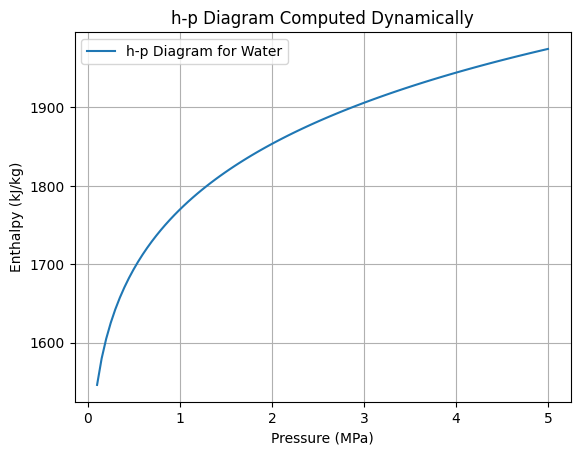

In [ ]:
# Define pressure range in Pascals
pressures = np.linspace(1e5, 5e6, 100)  # 100 points from 100 kPa to 5 MPa
enthalpies = [PropsSI("H", "P", p, "Q", 0.5, fluid) for p in pressures]  # At 50% quality

plt.plot(pressures / 1e6, np.array(enthalpies) / 1e3, label=f"h-p Diagram for {fluid}")
plt.xlabel("Pressure (MPa)")
plt.ylabel("Enthalpy (kJ/kg)")
plt.title("h-p Diagram Computed Dynamically")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from CoolProp.CoolProp import PropsSI

fluid = "Water"
pressure = 2.1e6  # 2.1 MPa in Pascals
quality = 0.5  # 50% vapor-liquid mixture

enthalpy = PropsSI("H", "P", pressure, "Q", quality, fluid)  # Enthalpy in J/kg

print(f"At P = {pressure/1e6:.2f} MPa and x = {quality}, h = {enthalpy/1e3:.2f} kJ/kg")

At P = 2.10 MPa and x = 0.5, h = 1859.57 kJ/kg


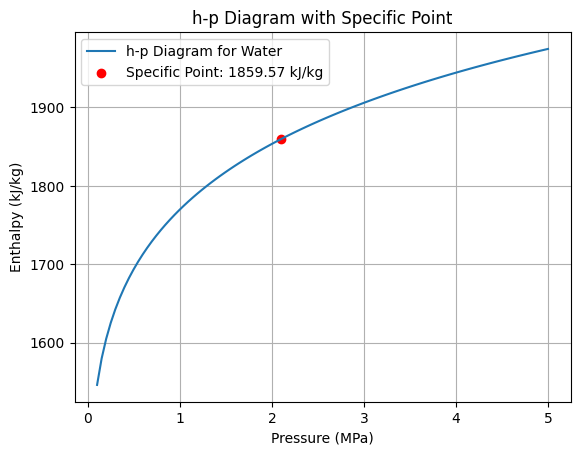

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for a range of pressures
pressures = np.linspace(1e5, 5e6, 100)
enthalpies = [PropsSI("H", "P", p, "Q", 0.5, fluid) for p in pressures]

# Define the specific point
specific_p = 2.1e6  # 2.1 MPa
specific_h = PropsSI("H", "P", specific_p, "Q", quality, fluid)

# Plot the h-p diagram
plt.plot(pressures / 1e6, np.array(enthalpies) / 1e3, label=f"h-p Diagram for {fluid}")
plt.scatter(specific_p / 1e6, specific_h / 1e3, color='red', label=f"Specific Point: {specific_h/1e3:.2f} kJ/kg")
plt.xlabel("Pressure (MPa)")
plt.ylabel("Enthalpy (kJ/kg)")
plt.title("h-p Diagram with Specific Point")
plt.legend()
plt.grid()
plt.show()

# Referencias
http://www.coolprop.org/